📌 Dataset Preview:
        City  Area_sqft  Bedrooms  Age_of_house  Has_Parking  Price_Lakh
0    Chennai       2957         2            21            0       83.71
1       Pune       1896         2            20            0       45.74
2  Bangalore        498         3             5            0       58.47
3       Pune       2600         3             0            0       72.39
4       Pune       2284         2             4            0       62.71

📊 Linear Regression Evaluation
--------------------------------
RMSE:     12.560
R² Score: 0.584


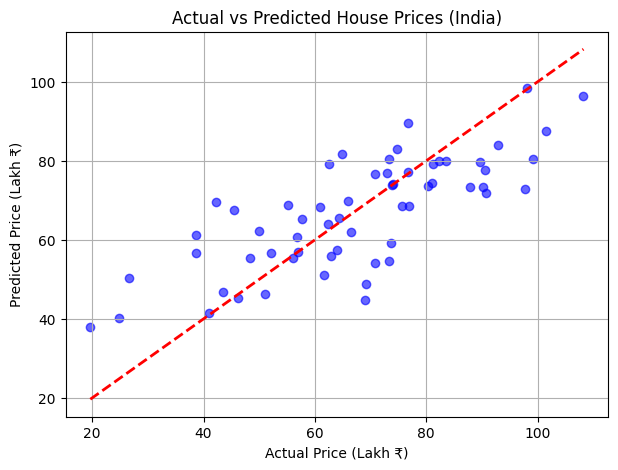

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("India_Housing_Dataset.csv")
print("📌 Dataset Preview:")
print(df.head())

# Features and target
X = df.drop(columns=["Price_Lakh"])
y = df["Price_Lakh"]

# Preprocessing (One-hot encoding for City, scaling numeric values)
ct = ColumnTransformer([
    ("encode", OneHotEncoder(drop='first'), ["City"]),
    ("scale", StandardScaler(), ["Area_sqft", "Bedrooms", "Age_of_house", "Has_Parking"])
], remainder="drop")

X_processed = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Linear Regression Evaluation")
print("--------------------------------")
print(f"RMSE:     {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.title("Actual vs Predicted House Prices (India)")
plt.xlabel("Actual Price (Lakh ₹)")
plt.ylabel("Predicted Price (Lakh ₹)")
plt.grid(True)
plt.show()
